# Data Cleansing with Spark

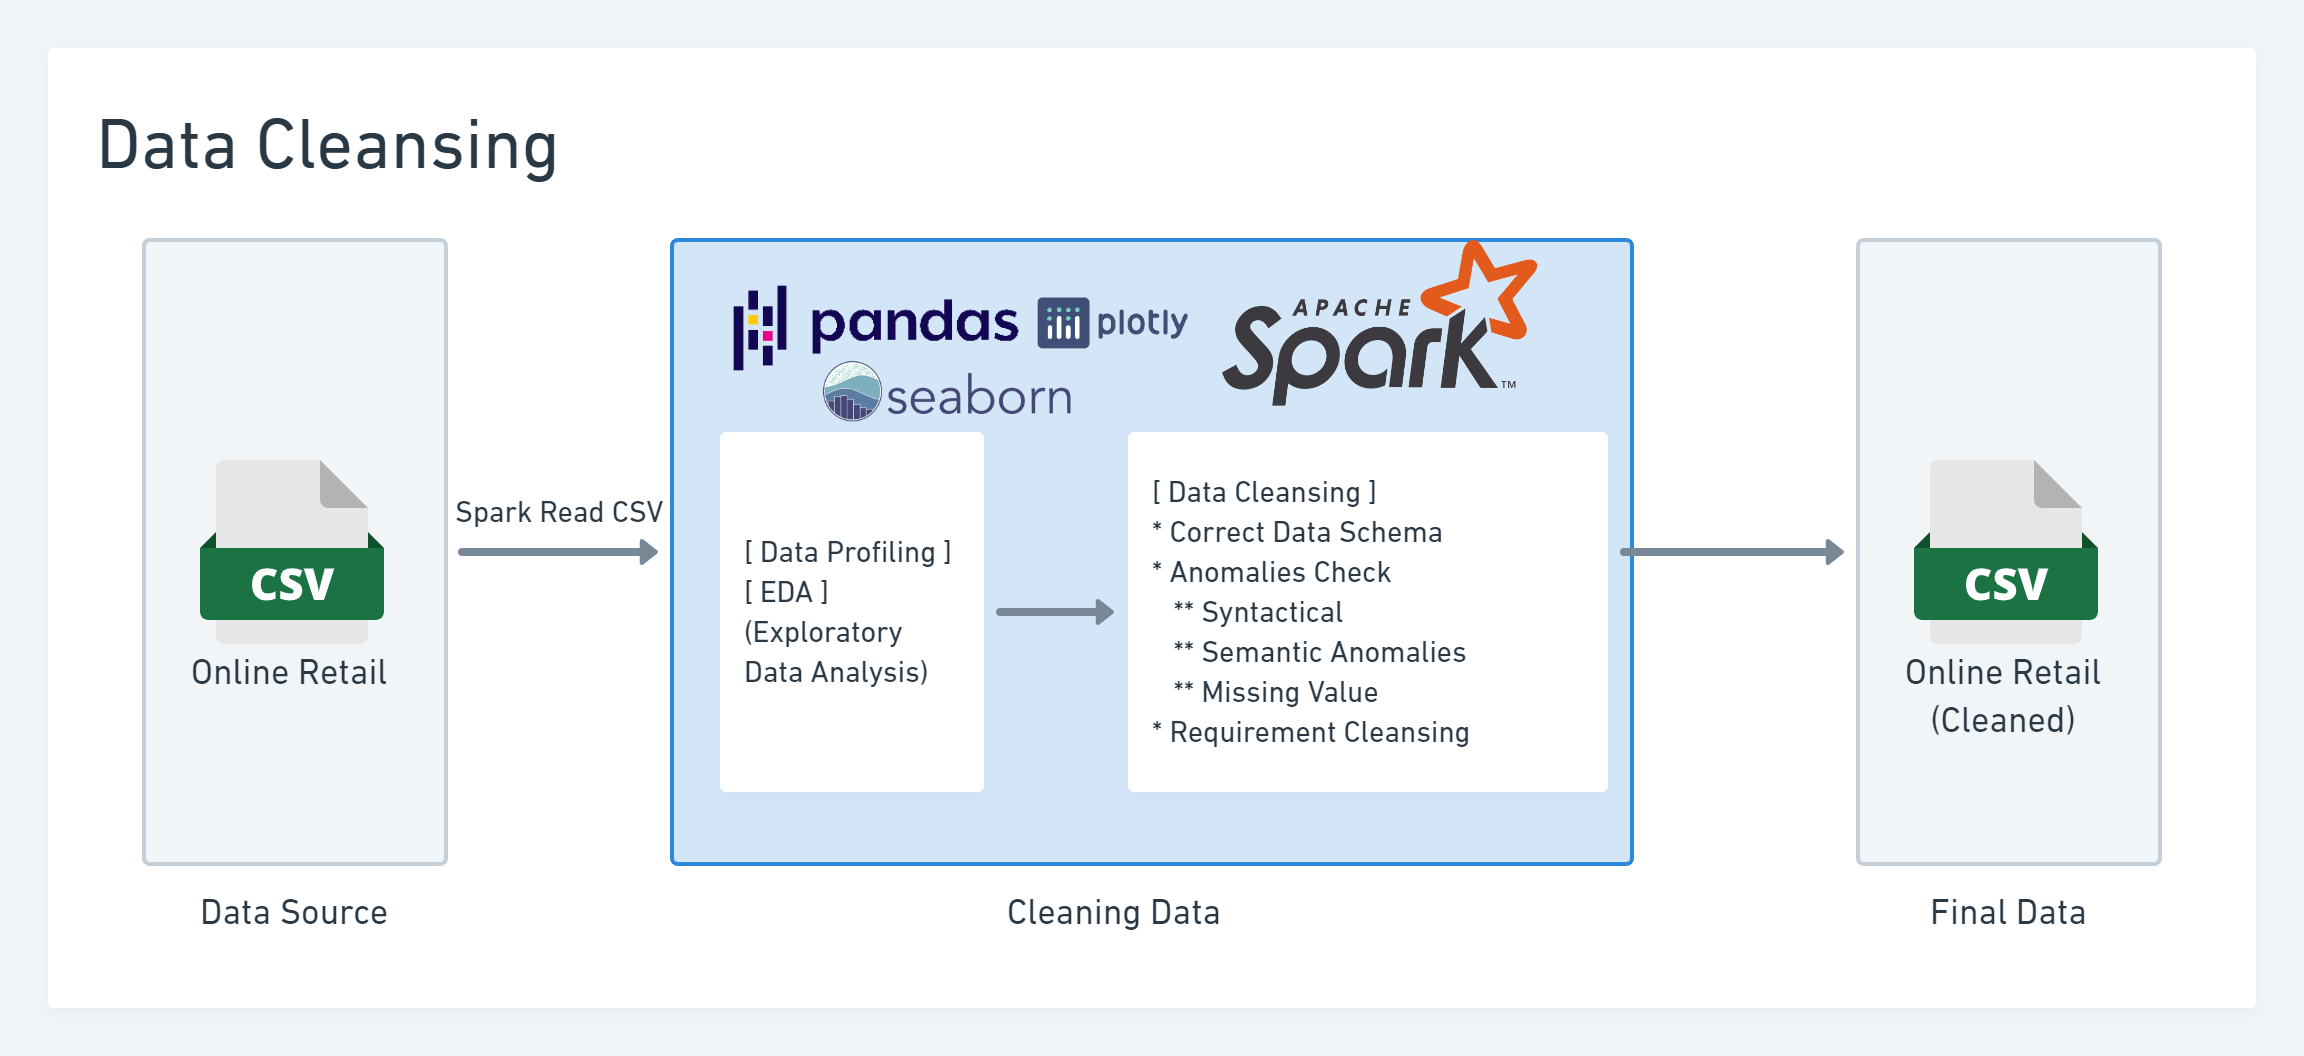

## Online Retails
### Data Dictionary
https://archive.ics.uci.edu/ml/datasets/Online+Retail

This is a transactional data set which contains all the transactions occurring between 01/12/2018 and 09/12/2019 for a UK-based and registered non-store online retail.

The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.


## Install PySpark 

In [ ]:
# Install Pyspark
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark==1.3.0

In [2]:
# Set enviroment variable 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
# Install pyspark with pip
!pip install pyspark==3.1.2

     |████████████████████████████████| 212.4 MB 67 kB/s 
     |████████████████████████████████| 198 kB 41.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=3a91ff1b6c884f40de5ef4196f99944c7de54471f465c4ab27be5b9b9ba35c54
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


####  Spark Multi-Core


In [4]:
# Check CPU Infomation on google lab server
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.224
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.44
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [5]:
# Create Spark Session
from pyspark.sql import SparkSession
# Define to use * (all CPU core on server)
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.legacy.timeParserPolicy", "legacy")

In [6]:
# Get Python version
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)

In [7]:
# Get Spark version
spark.version

'3.1.2'

#### Download Online Retail Data


In [8]:
!gdown --id 1UUOouflrlgWDOr5Mp2WS6EFFUjjAsoOQ

Downloading...
From: https://drive.google.com/uc?id=1UUOouflrlgWDOr5Mp2WS6EFFUjjAsoOQ
To: /content/online_ratail_unclened.csv.csv
100% 45.9M/45.9M [00:00<00:00, 146MB/s]


## Load data
Use `spark.read.csv` for read csv file

Set arguments:
Header = True (Use first row for header)   
Inferschema = True  

In [9]:
dt = spark.read.csv('/content/online_ratail_unclened.csv.csv', header = True, inferSchema = True, )

### Data Profiling


#### Data

> Columns
- InvoiceNo
- StockCode
- Description
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country

In [10]:
dt

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

In [11]:
dt.show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2018 08:26|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|1/12/2018 08:

In [14]:
dt.show(30)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2018 08:26|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|1/12/2018 08:

In [15]:
# Show Schema
dt.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'string'),
 ('UnitPrice', 'double'),
 ('CustomerID', 'double'),
 ('Country', 'string')]

In [16]:
# Show Schema 
dt.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [17]:
# Count Row and Column
print((dt.count(), len(dt.columns)))

(541909, 8)


In [18]:
# Statistics Description
dt.describe().show()

+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|            541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0|  9.55224954743324|           null|4.611113626082972|15287.690570239585|       null|
| stddev|13428.417280805186| 16799.73762842771|                null|218.08115785023477|           null|96.75985306117933|1713.6003033215918|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|            -8

In [19]:
# Statistics Description
dt.summary().show()

+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|            541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0|  9.55224954743324|           null|4.611113626082972|15287.690570239585|       null|
| stddev|13428.417280805186| 16799.73762842771|                null|218.08115785023477|           null|96.75985306117933|1713.6003033215918|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|            -8

In [20]:
# Get Describe of [Quantity, UnitPrice] Columns
dt.select("Quantity", "UnitPrice").describe().show()

+-------+------------------+-----------------+
|summary|          Quantity|        UnitPrice|
+-------+------------------+-----------------+
|  count|            541909|           541909|
|   mean|  9.55224954743324|4.611113626082972|
| stddev|218.08115785023477|96.75985306117933|
|    min|            -80995|        -11062.06|
|    max|             80995|          38970.0|
+-------+------------------+-----------------+



### Get Median of Quantity

In [21]:
dt.select("Quantity").summary().show()

+-------+------------------+
|summary|          Quantity|
+-------+------------------+
|  count|            541909|
|   mean|  9.55224954743324|
| stddev|218.08115785023477|
|    min|            -80995|
|    25%|                 1|
|    50%|                 3|
|    75%|                10|
|    max|             80995|
+-------+------------------+



In [22]:
dt.select("Quantity").summary().collect()[5]['Quantity']

'3'

## EDA - Exploratory Data Analysis

### Non-Graphical EDA

In [23]:
# Select text-based information
dt.where(dt['Quantity'] < 0).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|  C536379|        D|            Discount|      -1|1/12/2018 09:41|     27.5|   14527.0|United Kingdom|
|  C536383|   35004C|SET OF 3 COLOURED...|      -1|1/12/2018 09:49|     4.65|   15311.0|United Kingdom|
|  C536391|    22556|PLASTERS IN TIN C...|     -12|1/12/2018 10:24|     1.65|   17548.0|United Kingdom|
|  C536391|    21984|PACK OF 12 PINK P...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21983|PACK OF 12 BLUE P...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21980|PACK OF 12 RED RE...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21484|CHICK GREY HOT WA...|     -12|1/12/2018 10:

In [24]:
# 1. Quantity 50 - 120
dt.where((dt['Quantity'] >=50)&( dt['Quantity'] <= 120)).show(5)
# Or
dt.where(dt['Quantity'].between(50, 120)).show(5)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536371|    22086|PAPER CHAIN KIT 5...|      80|1/12/2018 09:00|     2.55|   13748.0|United Kingdom|
|   536376|    21733|RED HANGING HEART...|      64|1/12/2018 09:32|     2.55|   15291.0|United Kingdom|
|   536378|    21212|PACK OF 72 RETROS...|     120|1/12/2018 09:37|     0.42|   14688.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536382|    22381|TOY TIDY PINK POL...|      50|1/12/2018 09:45|     1.85|   16098.0|United Kingdom|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
only showing top 5 rows

+---------+---------+------------------

In [25]:
# 2. UnitPrice 0.1 - 0.5
dt.where((dt['UnitPrice'] >= 0.1)&(dt['UnitPrice'] <= 0.5)).show(5)
# Or
dt.where(dt['UnitPrice'].between(0.1, 0.5)).show(5)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536370|    22540|MINI JIGSAW CIRCU...|      24|1/12/2018 08:45|     0.42|   12583.0|        France|
|   536370|    22544|MINI JIGSAW SPACEBOY|      24|1/12/2018 08:45|     0.42|   12583.0|        France|
|   536378|    21212|PACK OF 72 RETROS...|     120|1/12/2018 09:37|     0.42|   14688.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536388|    22915|ASSORTED BOTTLE T...|      12|1/12/2018 09:59|     0.42|   16250.0|United Kingdom|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
only showing top 5 rows

+---------+---------+------------------

In [26]:
# TODO: 3. Quantity 50 - 120 and UnitPrice 0.1 - 0.5
dt.where(((dt['Quantity'] >=  50)&(dt['Quantity'] <= 120)) & ((dt['UnitPrice'] >= 0.1)&(dt['UnitPrice'] <= 0.5))).show(5)
# Or
dt.where((dt['UnitPrice'].between(0.1, 0.5)) & (dt['Quantity']).between(50, 120)).show(5)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536378|    21212|PACK OF 72 RETROS...|     120|1/12/2018 09:37|     0.42|   14688.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536532|    84692|BOX OF 24 COCKTAI...|      50|1/12/2018 13:24|     0.42|   12433.0|        Norway|
|   536563|   85199S|SMALL HANGING IVO...|      72|1/12/2018 15:08|     0.42|   17760.0|United Kingdom|
|   536617|    85175|CACTI T-LIGHT CAN...|      96|2/12/2018 10:17|     0.42|   13941.0|United Kingdom|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
only showing top 5 rows

+---------+---------+------------------

### Graphical EDA


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Convert Spark Dataframe to Pandas Dataframe 
dt_pd = dt.toPandas()

In [29]:
dt_pd.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2018 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2018 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2018 08:26,3.39,17850.0,United Kingdom


In [30]:
# Select some recored for display 
dt_subset = dt_pd[0:500]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


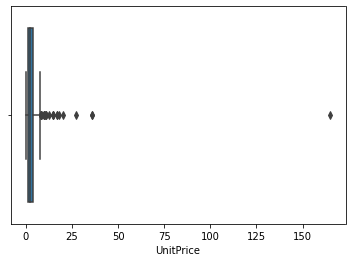

In [31]:
# Boxplot
sns.boxplot(dt_subset['UnitPrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


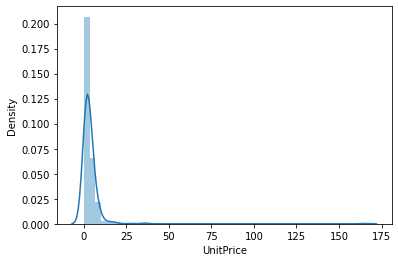

In [32]:
# Histogram
sns.distplot(dt_subset['UnitPrice']) 
plt.show()

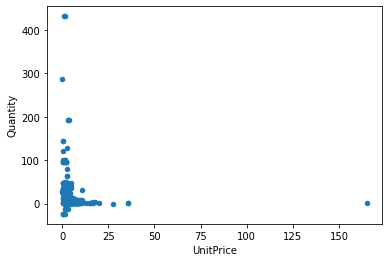

In [34]:
# Scatterplot
dt_subset.plot.scatter('UnitPrice', 'Quantity')

#### Interactive chart

In [35]:
# Plotly - interactive chart
import plotly.express as px
fig = px.scatter(dt_subset, 'UnitPrice', 'Quantity')
fig.show()

### Type Conversion

Convert `InvoiceDate` from string to date

In [36]:
# Show top 5 rows
dt.show(5)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
only showing top 5 rows



In [37]:
# Show Schema
dt.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



Is the date DD/MM/YYYY or MM/DD/YYYY? Let's find out



In [38]:
# Show unique Invoice Date
dt.select("InvoiceDate").distinct().show()

+----------------+
|     InvoiceDate|
+----------------+
| 2/12/2018 11:23|
| 6/12/2018 13:41|
| 9/12/2018 14:44|
|13/12/2018 13:09|
|13/12/2018 16:46|
|14/12/2018 10:28|
|21/12/2018 15:13|
|  7/1/2019 15:19|
| 12/1/2019 09:48|
| 14/1/2019 14:28|
| 19/1/2019 14:43|
| 26/1/2019 17:15|
|  1/2/2019 10:04|
|  1/2/2019 12:53|
|  3/2/2019 11:30|
|  7/2/2019 14:51|
| 14/2/2019 12:36|
| 14/2/2019 13:11|
| 24/2/2019 09:05|
| 25/2/2019 13:56|
+----------------+
only showing top 20 rows



In [39]:
# Convert string to date
from pyspark.sql import functions as f

dt_temp = dt.withColumn('InvoiceDateTime', 
    f.unix_timestamp('InvoiceDate', 'dd/MM/yyyy HH:mm').cast('timestamp')
)
dt_temp.show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   5363

In [42]:
dt_temp.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



In [43]:
# Drop InvoiceDate Columns
dt_final = dt_temp.drop('InvoiceDate')
dt_final.show()

+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    21730|GLASS S

In [44]:
dt_final.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



## Data Cleansing with Spark

### Anomalies Check

#### Syntactical Anomalies
**Lexical errors** 

In [131]:
# Check country distinct values. Find something interesting?
dt_final.select("Country").distinct().show()

+------------------+
|           Country|
+------------------+
|            Sweden|
|         Singapore|
|           Germany|
|               RSA|
|            France|
|            Greece|
|European Community|
|           Belgium|
|           Finland|
|             Malta|
|       Unspecified|
|             Italy|
|              EIRE|
|         Lithuania|
|            Norway|
|             Spain|
|             EIREs|
|           Denmark|
|         Hong Kong|
|           Iceland|
+------------------+
only showing top 20 rows



In [46]:
dt_final.where(dt_final['Country'] == 'EIREs').show()

+---------+---------+--------------------+--------+---------+----------+-------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------+----------+-------+-------------------+
|   539473|       C2|            CARRIAGE|       1|     50.0|   14911.0|  EIREs|2018-12-19 14:24:00|
|   542216|    84978|HANGING HEART JAR...|      24|     1.25|   14911.0|  EIREs|2019-01-26 12:29:00|
|   560451|    22844|VINTAGE CREAM DOG...|       2|      8.5|   14911.0|  EIREs|2019-07-19 09:50:00|
|   565748|    23163| REGENCY SUGAR TONGS|       8|     2.49|   14156.0|  EIREs|2019-09-06 12:38:00|
|   565928|    21889|WOODEN BOX OF DOM...|      12|     1.25|      null|  EIREs|2019-09-08 10:09:00|
+---------+---------+--------------------+--------+---------+----------+-------+-------------------+



In [48]:
# Change EIREs to EIRE
from pyspark.sql.functions import when

dt_temp_eire = dt_final.withColumn("CountryUpdate", when(dt_final['Country'] == 'EIREs', 'EIRE').otherwise(dt_final['Country']))

In [49]:
# Check the result
dt_temp_eire.select("CountryUpdate").distinct().show()

+------------------+
|     CountryUpdate|
+------------------+
|            Sweden|
|         Singapore|
|           Germany|
|               RSA|
|            France|
|            Greece|
|European Community|
|           Belgium|
|           Finland|
|             Malta|
|       Unspecified|
|             Italy|
|              EIRE|
|         Lithuania|
|            Norway|
|             Spain|
|           Denmark|
|         Hong Kong|
|           Iceland|
|            Israel|
+------------------+
only showing top 20 rows



In [50]:
# Create final Dataframe
dt_final_eire = dt_temp_eire.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

In [51]:
dt_final_eire.show()

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    21730|GLASS S

#### Semantic Anomalies

**Integrity constraints**
- Stockcode: (must have 5 digits)

In [54]:
dt_final_eire.select("Stockcode").show(15)

+---------+
|Stockcode|
+---------+
|   85123A|
|    71053|
|   84406B|
|   84029G|
|   84029E|
|    22752|
|    21730|
|    22633|
|    22632|
|    84879|
|    22745|
|    22748|
|    22749|
|    22310|
|    84969|
+---------+
only showing top 15 rows



In [52]:
dt_final_eire.count()

541909

In [55]:
dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$")).count()

487036

In [56]:
# Filter correct StockCode
dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$")).show(5)

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|     4.25|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536366|    22633|HAND WARMER UNION...|       6|     1.85|   17850.0|2018-12-01 08:28:00|United Kingdom|
|   536366|    22632|HAND WARMER RED P...|       6|     1.85|   17850.0|2018-12-01 08:28:00|United Kingdom|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
only showing top 5 rows



In [57]:
# Filter incorrect StockCode
dt_correct_stockcode = dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$"))
dt_incorrect_stockcode = dt_final_eire.subtract(dt_correct_stockcode)

dt_incorrect_stockcode.show(10)

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   540122|   84926E|FLOWERS TILE COASTER|      96|     0.42|   13694.0|2019-01-05 10:39:00|United Kingdom|
|   542936|   84596G|SMALL CHOCOLATES ...|       1|     1.25|      null|2019-02-02 11:10:00|United Kingdom|
|   539479|   84997B|RED 3 PIECE RETRO...|       1|     3.75|      null|2018-12-19 15:20:00|United Kingdom|
|   545308|   84406B|CREAM CUPID HEART...|       1|     4.15|   14656.0|2019-03-01 13:19:00|United Kingdom|
|   576687|   85099B|JUMBO BAG RED RET...|       3|     2.08|   13558.0|2019-11-16 12:13:00|United Kingdom|
|   542374|   46000S|POLYESTER FILLER ...|       4|     1.45|   15696.0|2019-01-27 13:40:00|United Kingdom|
|   552572|   84997A|CHILDRE

In [58]:
# Remove last digit of incorrect StockCode
from pyspark.sql.functions import regexp_replace

dt_temp_stockcode = dt_final_eire.withColumn("StockcodeUpdate", regexp_replace(dt_final_eire['Stockcode'], r'[A-Z]', ''))

In [59]:
# Check the result
dt_temp_stockcode.show()

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+---------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockcodeUpdate|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+---------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|          85123|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|          71053|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|          84406|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|          84029|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|          84029|
|   5363

In [60]:
# Create final Dataframe
dt_final_stockcode = dt_temp_stockcode.drop("Stockcode").withColumnRenamed('StockcodeUpdate', 'StockCode')

In [62]:
dt_final_stockcode.show(5)

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
only showing top 5 rows



#### Missing values


In [68]:
# Check missing values each columns
from pyspark.sql.functions import col,sum

dt_final_stockcode.select(*[sum(col(column).isNull().cast("int")).alias(column + "(Null)") for column in dt_final_stockcode.columns]).show()

+---------------+-----------------+--------------+---------------+----------------+---------------------+-------------+---------------+
|InvoiceNo(Null)|Description(Null)|Quantity(Null)|UnitPrice(Null)|CustomerID(Null)|InvoiceDateTime(Null)|Country(Null)|StockCode(Null)|
+---------------+-----------------+--------------+---------------+----------------+---------------------+-------------+---------------+
|              0|             1454|             0|              0|          135080|                    0|            0|              0|
+---------------+-----------------+--------------+---------------+----------------+---------------------+-------------+---------------+



In [65]:
# Check null on description column

dt_final_stockcode.where( dt_final_stockcode['Description'].isNull() ).show()

+---------+-----------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+-----------+--------+---------+----------+-------------------+--------------+---------+
|   536414|       null|      56|      0.0|      null|2018-12-01 11:52:00|United Kingdom|    22139|
|   536545|       null|       1|      0.0|      null|2018-12-01 14:32:00|United Kingdom|    21134|
|   536546|       null|       1|      0.0|      null|2018-12-01 14:33:00|United Kingdom|    22145|
|   536547|       null|       1|      0.0|      null|2018-12-01 14:33:00|United Kingdom|    37509|
|   536549|       null|       1|      0.0|      null|2018-12-01 14:34:00|United Kingdom|    85226|
|   536550|       null|       1|      0.0|      null|2018-12-01 14:34:00|United Kingdom|    85044|
|   536552|       null|       1|      0.0|      null|2018-12-01 14:34:00|United Kingdom|    20950|
|   536553

In [66]:
# Check null on customerID columns

dt_final_stockcode.where( dt_final_stockcode['customerID'].isNull() ).show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536414|                null|      56|      0.0|      null|2018-12-01 11:52:00|United Kingdom|    22139|
|   536544|DECORATIVE ROSE B...|       1|     2.51|      null|2018-12-01 14:32:00|United Kingdom|    21773|
|   536544|DECORATIVE CATS B...|       2|     2.51|      null|2018-12-01 14:32:00|United Kingdom|    21774|
|   536544|  POLKADOT RAIN HAT |       4|     0.85|      null|2018-12-01 14:32:00|United Kingdom|    21786|
|   536544|RAIN PONCHO RETRO...|       2|     1.66|      null|2018-12-01 14:32:00|United Kingdom|    21787|
|   536544|  VINTAGE SNAP CARDS|       9|     1.66|      null|2018-12-01 14:32:00|United Kingdom|    21790|
|   536544|VINTAGE HEADS AND

### Requirement Clensing
Replace Customer ID is NULL with -1

In [84]:
# Write code here
dt_not_null = dt_final_stockcode.withColumn("CustomerIDUpdate" , when(dt_final_stockcode['CustomerID'].isNull(), -1).otherwise(dt_final_stockcode['CustomerID']))

In [87]:
dt_not_null.where( dt_final_stockcode['customerID'].isNull()).show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+----------------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|CustomerIDUpdate|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+----------------+
|   536414|                null|      56|      0.0|      null|2018-12-01 11:52:00|United Kingdom|    22139|            -1.0|
|   536544|DECORATIVE ROSE B...|       1|     2.51|      null|2018-12-01 14:32:00|United Kingdom|    21773|            -1.0|
|   536544|DECORATIVE CATS B...|       2|     2.51|      null|2018-12-01 14:32:00|United Kingdom|    21774|            -1.0|
|   536544|  POLKADOT RAIN HAT |       4|     0.85|      null|2018-12-01 14:32:00|United Kingdom|    21786|            -1.0|
|   536544|RAIN PONCHO RETRO...|       2|     1.66|      null|2018-12-01 14:32:00|United Kingdom|    21787|            -1.0|


In [88]:
dt_final_stockcode = dt_not_null.drop("CustomerID").withColumnRenamed('CustomerIDUpdate', 'CustomerID')

In [92]:
# Check final dt after replace null value of CustomerID with -1
dt_final_stockcode.where(dt_final_stockcode['CustomerID'] == -1).show()

+---------+--------------------+--------+---------+-------------------+--------------+---------+----------+
|InvoiceNo|         Description|Quantity|UnitPrice|    InvoiceDateTime|       Country|StockCode|CustomerID|
+---------+--------------------+--------+---------+-------------------+--------------+---------+----------+
|   536414|                null|      56|      0.0|2018-12-01 11:52:00|United Kingdom|    22139|      -1.0|
|   536544|DECORATIVE ROSE B...|       1|     2.51|2018-12-01 14:32:00|United Kingdom|    21773|      -1.0|
|   536544|DECORATIVE CATS B...|       2|     2.51|2018-12-01 14:32:00|United Kingdom|    21774|      -1.0|
|   536544|  POLKADOT RAIN HAT |       4|     0.85|2018-12-01 14:32:00|United Kingdom|    21786|      -1.0|
|   536544|RAIN PONCHO RETRO...|       2|     1.66|2018-12-01 14:32:00|United Kingdom|    21787|      -1.0|
|   536544|  VINTAGE SNAP CARDS|       9|     1.66|2018-12-01 14:32:00|United Kingdom|    21790|      -1.0|
|   536544|VINTAGE HEADS AND

### Clean With Spark SQL



Select `unitPrice` and `Quantity` value > 0

In [93]:
dt_final_stockcode.createOrReplaceTempView("sales")
dt_sql = spark.sql("SELECT * FROM sales")
dt_sql.show()

+---------+--------------------+--------+---------+-------------------+--------------+---------+----------+
|InvoiceNo|         Description|Quantity|UnitPrice|    InvoiceDateTime|       Country|StockCode|CustomerID|
+---------+--------------------+--------+---------+-------------------+--------------+---------+----------+
|   536365|WHITE HANGING HEA...|       6|     2.55|2018-12-01 08:26:00|United Kingdom|    85123|   17850.0|
|   536365| WHITE METAL LANTERN|       6|     3.39|2018-12-01 08:26:00|United Kingdom|    71053|   17850.0|
|   536365|CREAM CUPID HEART...|       8|     2.75|2018-12-01 08:26:00|United Kingdom|    84406|   17850.0|
|   536365|KNITTED UNION FLA...|       6|     3.39|2018-12-01 08:26:00|United Kingdom|    84029|   17850.0|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|2018-12-01 08:26:00|United Kingdom|    84029|   17850.0|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|2018-12-01 08:26:00|United Kingdom|    22752|   17850.0|
|   536365|GLASS STAR FROSTE

In [95]:
dt_sql_count = spark.sql("SELECT count(*) as count_row FROM sales")
dt_sql_count.show()

+---------+
|count_row|
+---------+
|   541909|
+---------+



In [98]:
dt_sql_count = spark.sql("SELECT count(*) as cnt_row, country FROM sales GROUP BY Country ORDER BY cnt_row DESC")
dt_sql_count.show()

+-------+---------------+
|cnt_row|        country|
+-------+---------------+
| 495478| United Kingdom|
|   9495|        Germany|
|   8557|         France|
|   8196|           EIRE|
|   2533|          Spain|
|   2371|    Netherlands|
|   2069|        Belgium|
|   2002|    Switzerland|
|   1519|       Portugal|
|   1259|      Australia|
|   1086|         Norway|
|    803|          Italy|
|    758|Channel Islands|
|    695|        Finland|
|    622|         Cyprus|
|    462|         Sweden|
|    446|    Unspecified|
|    401|        Austria|
|    389|        Denmark|
|    358|          Japan|
+-------+---------------+
only showing top 20 rows



In [99]:
dt_sql_valid_price = spark.sql("SELECT count(*) as cnt_row FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show()

+-------+
|cnt_row|
+-------+
| 530104|
+-------+



In [100]:
dt_sql_valid_price = spark.sql("SELECT * FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show()

+---------+--------------------+--------+---------+-------------------+--------------+---------+----------+
|InvoiceNo|         Description|Quantity|UnitPrice|    InvoiceDateTime|       Country|StockCode|CustomerID|
+---------+--------------------+--------+---------+-------------------+--------------+---------+----------+
|   536365|WHITE HANGING HEA...|       6|     2.55|2018-12-01 08:26:00|United Kingdom|    85123|   17850.0|
|   536365| WHITE METAL LANTERN|       6|     3.39|2018-12-01 08:26:00|United Kingdom|    71053|   17850.0|
|   536365|CREAM CUPID HEART...|       8|     2.75|2018-12-01 08:26:00|United Kingdom|    84406|   17850.0|
|   536365|KNITTED UNION FLA...|       6|     3.39|2018-12-01 08:26:00|United Kingdom|    84029|   17850.0|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|2018-12-01 08:26:00|United Kingdom|    84029|   17850.0|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|2018-12-01 08:26:00|United Kingdom|    22752|   17850.0|
|   536365|GLASS STAR FROSTE

In [120]:
# TODO: Country USA  InvoiceDateTime from 2010-12-01 and  UnitPrice > 3.5
dt_usa = spark.sql("SELECT * FROM sales WHERE Country='USA' AND InvoiceDateTime >= '2010-12-01' AND UnitPrice > 3.5")
dt_usa.show()

+---------+--------------------+--------+---------+-------------------+-------+---------+----------+
|InvoiceNo|         Description|Quantity|UnitPrice|    InvoiceDateTime|Country|StockCode|CustomerID|
+---------+--------------------+--------+---------+-------------------+-------+---------+----------+
|   550644|SET OF 6 SPICE TI...|       7|     3.95|2019-04-19 16:19:00|    USA|    22722|   12733.0|
|   550644|SET OF 3 CAKE TIN...|       1|     4.95|2019-04-19 16:19:00|    USA|    22720|   12733.0|
|   550644|PINK HAPPY BIRTHD...|       4|     5.45|2019-04-19 16:19:00|    USA|    47590|   12733.0|
|   550644|COTTON APRON PANT...|       5|     4.95|2019-04-19 16:19:00|    USA|    22990|   12733.0|
|   550644|REGENCY CAKESTAND...|       6|    12.75|2019-04-19 16:19:00|    USA|    22423|   12733.0|
|   550644|TEA TIME TEA SET ...|       5|     6.95|2019-04-19 16:19:00|    USA|    37501|   12733.0|
|   550644|TEA TIME TEAPOT I...|       4|     4.95|2019-04-19 16:19:00|    USA|    37500|  

In [124]:
# TODO: Country France InvoiceDateTime from 2010-12-05 , UnitPrice > 5.5, Include Box in description
dt_france = spark.sql("SELECT * FROM sales WHERE Country='France' AND InvoiceDateTime >= '2010-12-05' AND UnitPrice > 5.5 AND UPPER(Description) LIKE '%BOX%'")
dt_france.show()

+---------+--------------------+--------+---------+-------------------+-------+---------+----------+
|InvoiceNo|         Description|Quantity|UnitPrice|    InvoiceDateTime|Country|StockCode|CustomerID|
+---------+--------------------+--------+---------+-------------------+-------+---------+----------+
|   537065|ROSE COTTAGE KEEP...|       8|      8.5|2018-12-05 11:57:00| France|    22968|   12567.0|
|   537065|  TOOL BOX SOFT TOY |       6|     8.95|2018-12-05 11:57:00| France|    21055|   12567.0|
|   537463|BOOM BOX SPEAKER ...|       4|     5.95|2018-12-07 10:08:00| France|    21064|   12681.0|
|   537897|SET 7 BABUSHKA NE...|       2|      8.5|2018-12-09 10:37:00| France|    22752|   12683.0|
|   539607|BOOM BOX SPEAKER ...|       4|     5.95|2018-12-20 14:10:00| France|    21065|   12681.0|
|   540178|BOOM BOX SPEAKER ...|       2|     5.95|2019-01-05 12:42:00| France|    21064|   12681.0|
|   540351|  TOOL BOX SOFT TOY |       1|     8.95|2019-01-06 14:26:00| France|    21055|  

## Save cleaned data to CSV


In [122]:
# Write as partitioned files (use multiple workers)
dt_sql_valid_price.write.csv('Cleaned_Data_Final.csv', header = True)

In [123]:
# Write as 1 file (use single worker)
dt_sql_valid_price.coalesce(1).write.csv('Cleaned_Data_Now_Final_Single.csv', header = True)

### Read data file from multiple part



In [125]:
# Part 1
part1 = spark.read.csv('/content/Cleaned_Data_Final.csv/part-00000-7888554e-d021-420f-b353-f24264933e5f-c000.csv', header = True, inferSchema = True, )
part1.count()

290871

In [126]:
# Part 2
part2 = spark.read.csv('/content/Cleaned_Data_Final.csv/part-00001-7888554e-d021-420f-b353-f24264933e5f-c000.csv', header = True, inferSchema = True, )
part2.count()

239233

In [130]:
# Read All Part 
all_part =  spark.read.csv('/content/Cleaned_Data_Final.csv/*.csv', header = True, inferSchema = True, )
all_part.count()

530104